# Geopandas - geocoding, interactive plotting
More IO, interactive visualization using folium and geocoding

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon, LineString
import seaborn as sns
import pyepsg
%matplotlib inline
plt.style.use('bmh')

## Read CSV data

In [2]:
df = pd.read_csv('data/2015-06-21.csv')
df.head()

,Start time,End time,Calories (kcal),Distance (m),Average heart rate (bpm),Max heart rate (bpm),Min heart rate (bpm),Height (m),Low latitude (deg),Low longitude (deg),...,High longitude (deg),Average speed (m/s),Max speed (m/s),Min speed (m/s),Step count,Average weight (kg),Max weight (kg),Min weight (kg),Inactive duration (ms),Walking duration (ms)
0,00:00:00.000-07:00,00:15:00.000-07:00,16.215914,NaN,NaN,NaN,NaN,NaN,34.054939,-117.242691,...,-117.242432,NaN,NaN,NaN,NaN,NaN,NaN,NaN,900000,NaN
1,00:15:00.000-07:00,00:30:00.000-07:00,16.215914,NaN,NaN,NaN,NaN,NaN,34.054955,-117.242424,...,-117.242401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,900000,NaN
2,00:30:00.000-07:00,00:45:00.000-07:00,16.215914,NaN,NaN,NaN,NaN,NaN,34.054939,-117.242706,...,-117.242416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,900000,NaN
3,00:45:00.000-07:00,01:00:00.000-07:00,16.215914,NaN,NaN,NaN,NaN,NaN,34.054970,-117.242661,...,-117.242447,NaN,NaN,NaN,NaN,NaN,NaN,NaN,900000,NaN
4,01:00:00.000-07:00,01:15:00.000-07:00,16.215914,NaN,NaN,NaN,NaN,NaN,34.054977,-117.242668,...,-117.242409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,900000,NaN


In [3]:
df.shape

(96, 21)

In [4]:
df.columns

Index(['Start time', 'End time', 'Calories (kcal)', 'Distance (m)',
       'Average heart rate (bpm)', 'Max heart rate (bpm)',
       'Min heart rate (bpm)', 'Height (m)', 'Low latitude (deg)',
       'Low longitude (deg)', 'High latitude (deg)', 'High longitude (deg)',
       'Average speed (m/s)', 'Max speed (m/s)', 'Min speed (m/s)',
       'Step count', 'Average weight (kg)', 'Max weight (kg)',
       'Min weight (kg)', 'Inactive duration (ms)', 'Walking duration (ms)'],
      dtype='object')

filter out columns without data

In [5]:
df.describe()

,Calories (kcal),Distance (m),Average heart rate (bpm),Max heart rate (bpm),Min heart rate (bpm),Height (m),Low latitude (deg),Low longitude (deg),High latitude (deg),High longitude (deg),Average speed (m/s),Max speed (m/s),Min speed (m/s),Step count,Average weight (kg),Max weight (kg),Min weight (kg),Inactive duration (ms),Walking duration (ms)
count,96.000000,2.000000,0.0,0.0,0.0,0.0,91.000000,91.000000,91.000000,91.000000,2.000000,2.000000,2.000000,15.000000,0.0,0.0,0.0,96.000000,5.000000
mean,16.411472,31.000000,NaN,NaN,NaN,NaN,34.055033,-117.242620,34.055120,-117.242453,0.799705,0.799705,0.799705,116.600000,NaN,NaN,NaN,880833.302083,150074.200000
std,2.665210,2.828427,NaN,NaN,NaN,NaN,0.000113,0.000092,0.000075,0.000097,0.333833,0.333833,0.333833,157.019016,NaN,NaN,NaN,87443.309515,142937.658018
min,3.434296,29.000000,NaN,NaN,NaN,NaN,34.054150,-117.242844,34.054996,-117.242722,0.563649,0.563649,0.563649,1.000000,NaN,NaN,NaN,190607.000000,40929.000000
25%,16.215914,30.000000,NaN,NaN,NaN,NaN,34.054996,-117.242691,34.055063,-117.242500,0.681677,0.681677,0.681677,16.000000,NaN,NaN,NaN,900000.000000,50464.000000
50%,16.215914,31.000000,NaN,NaN,NaN,NaN,34.055023,-117.242653,34.055122,-117.242447,0.799705,0.799705,0.799705,64.000000,NaN,NaN,NaN,900000.000000,62575.000000
75%,16.215914,32.000000,NaN,NaN,NaN,NaN,34.055098,-117.242538,34.055174,-117.242405,0.917733,0.917733,0.917733,121.000000,NaN,NaN,NaN,900000.000000,233586.000000
max,34.519853,33.000000,NaN,NaN,NaN,NaN,34.055172,-117.242409,34.055359,-117.242027,1.035761,1.035761,1.035761,581.000000,NaN,NaN,NaN,900000.000000,362817.000000


In [7]:
df2 = df[['Start time', 'End time','Calories (kcal)','High latitude (deg)',
          'High longitude (deg)','Average speed (m/s)','Step count']]
df2.head(5)

,Start time,End time,Calories (kcal),High latitude (deg),High longitude (deg),Average speed (m/s),Step count
0,00:00:00.000-07:00,00:15:00.000-07:00,16.215914,34.054996,-117.242432,NaN,NaN
1,00:15:00.000-07:00,00:30:00.000-07:00,16.215914,34.055000,-117.242401,NaN,NaN
2,00:30:00.000-07:00,00:45:00.000-07:00,16.215914,34.055065,-117.242416,NaN,NaN
3,00:45:00.000-07:00,01:00:00.000-07:00,16.215914,34.055058,-117.242447,NaN,NaN
4,01:00:00.000-07:00,01:15:00.000-07:00,16.215914,34.055061,-117.242409,NaN,NaN


### Create a geopandas data frame from pandas dataframe

In [8]:
point_list = [Point(xy) for xy in zip(df2['High longitude (deg)'],df['High latitude (deg)'])]
point_list[:4]

It is not necessary to construct a geoseries, but Folium needs a geoseries and that to have a coordinate system set. So I am building it here

In [9]:
gseries = gpd.GeoSeries(point_list)

In [10]:
wgs84=pyepsg.get(4326)

In [11]:
# gseries.crs = pyepsg.get(4326)
gseries.crs ={'init':'epsg:4326'}

In [12]:
gdf = gpd.GeoDataFrame(data=df2, geometry=gseries)
gdf.head(4)

,Start time,End time,Calories (kcal),High latitude (deg),High longitude (deg),Average speed (m/s),Step count,geometry
0,00:00:00.000-07:00,00:15:00.000-07:00,16.215914,34.054996,-117.242432,NaN,NaN,POINT (-117.242431640625 34.05499649047852)
1,00:15:00.000-07:00,00:30:00.000-07:00,16.215914,34.055000,-117.242401,NaN,NaN,POINT (-117.2424011230469 34.05500030517578)
2,00:30:00.000-07:00,00:45:00.000-07:00,16.215914,34.055065,-117.242416,NaN,NaN,POINT (-117.2424163818359 34.0550651550293)
3,00:45:00.000-07:00,01:00:00.000-07:00,16.215914,34.055058,-117.242447,NaN,NaN,POINT (-117.2424468994141 34.05505752563477)


In [13]:
gdf[['High latitude (deg)','High longitude (deg)']].describe()

,High latitude (deg),High longitude (deg)
count,91.000000,91.000000
mean,34.055120,-117.242453
std,0.000075,0.000097
min,34.054996,-117.242722
25%,34.055063,-117.242500
50%,34.055122,-117.242447
75%,34.055174,-117.242405
max,34.055359,-117.242027


Drop the rows that don't have coordinates

In [14]:
gdf.dropna(subset=['High latitude (deg)'], inplace=True)
gdf.shape

(91, 8)

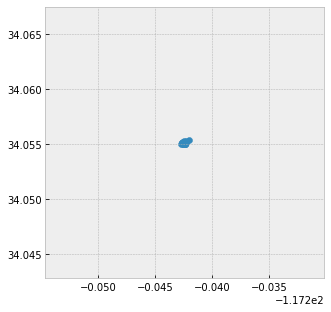

In [15]:
fig,ax= plt.subplots(1, figsize=(5,5))
gdf.plot(ax=ax)
# ax.set_xlim([-117.2,-117.4])
# ax.set_ylim([34.054, 34.055])

## Viz on Folium map

In [16]:
import folium
folium.__version__

'0.5.0'

In [17]:
# from folium.plugins import HeatMap
# hm = HeatMap(data=[xy for xy in zip(gdf['geometry'].x, gdf['geometry'].y)])

In [135]:
m = folium.Map(location=[34.054,-117.2], zoom_start=15)
folium.GeoJson(data=gdf).add_to(m)
m

## Geocoding
Geocoding is the process of turning addresses into coordinates by plotting them on a map. It is a combination of search and computation (when you interpolate street addresses for unknown extents) that is typically performed on server side due to the amount of data required on a global scale.

Geopandas uses [`geopy`](http://geopy.readthedocs.io/en/1.11.0/) to perform geocoding and returns the result of hits as a `geodataframe`.

In [18]:
from geopandas.tools import geocode, geocoding, reverse_geocode

In [19]:
type(geocode), type(reverse_geocode), type(geocoding)

(function, function, module)

Get list of providers from `geopy`

In [15]:
import geopy, inspect
print(geopy.__version__)

# use inspection, but limit to just classes
inspect.getmembers(geopy, predicate=inspect.isclass)

1.14.0


[('ArcGIS', geopy.geocoders.arcgis.ArcGIS),
 ('Baidu', geopy.geocoders.baidu.Baidu),
 ('Bing', geopy.geocoders.bing.Bing),
 ('DataBC', geopy.geocoders.databc.DataBC),
 ('GeoNames', geopy.geocoders.geonames.GeoNames),
 ('GeocodeFarm', geopy.geocoders.geocodefarm.GeocodeFarm),
 ('GoogleV3', geopy.geocoders.googlev3.GoogleV3),
 ('IGNFrance', geopy.geocoders.ignfrance.IGNFrance),
 ('LiveAddress', geopy.geocoders.smartystreets.LiveAddress),
 ('Location', geopy.location.Location),
 ('Mapzen', geopy.geocoders.mapzen.Mapzen),
 ('Nominatim', geopy.geocoders.osm.Nominatim),
 ('OpenCage', geopy.geocoders.opencage.OpenCage),
 ('OpenMapQuest', geopy.geocoders.openmapquest.OpenMapQuest),
 ('Photon', geopy.geocoders.photon.Photon),
 ('PickPoint', geopy.geocoders.pickpoint.PickPoint),
 ('Point', geopy.point.Point),
 ('What3Words', geopy.geocoders.what3words.What3Words),
 ('Yandex', geopy.geocoders.yandex.Yandex)]

In [20]:
geocode(strings='Hollywood sign') # default provider is googlev3

,address,geometry
0,"Los Angeles, CA 90068, USA",POINT (-118.3215482 34.1341151)


In [21]:
geocode(strings='Hollywood sign', provider='arcgis')

,address,geometry
0,Hollywood Sign,POINT (-118.3219799999999 34.13438000000008)


In [26]:
address_list = ['hospitals near Redlands, CA', 
                'groceries near Redlands, CA', 
                'schools near Redlands, CA']

geocoded_gdf = geocode(strings=address_list, provider='arcgis')
geocoded_gdf

,address,geometry
0,Redlands Community Hospital-ER,POINT (-117.2044100362101 34.03633005943772)
1,Target,POINT (-117.2072099744647 34.07031003505633)
2,Redlands East Valley High School,POINT (-117.12776 34.06201000000004)


In [30]:
m2 = folium.Map(location=[34.054,-117.2], zoom_start=12)
folium.GeoJson(data=geocoded_gdf).add_to(m2)
m2

In [31]:
m2.crs

'EPSG3857'

In [32]:
m2.to_json()

'{"name": "Map", "id": "94aa73e804f245ec8f4e34436a4a2412", "children": {"openstreetmap": {"name": "TileLayer", "id": "6e327110ed23459f86840082b427835d", "children": {}}, "geo_json_bd54f09d34e648ffbd9a583dc626582f": {"name": "GeoJson", "id": "bd54f09d34e648ffbd9a583dc626582f", "children": {}}}}'